In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv(r'D:\Users\Farhan\Desktop\Projects\PRCP-1004-Fifa20\Data\players_20.csv')

df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [7]:
print(f"Number of players: {df.shape[0]}, Number of features: {df.shape[1]}")

Number of players: 18278, Number of features: 104


In [8]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [9]:
print("Missing values (top 10):")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Missing values (top 10):
loaned_from             17230
nation_position         17152
nation_jersey_number    17152
player_tags             16779
gk_speed                16242
gk_diving               16242
gk_handling             16242
gk_reflexes             16242
gk_kicking              16242
gk_positioning          16242
dtype: int64


In [10]:
print("\nSummary statistics (numerical features):")
print(df.describe().head())


Summary statistics (numerical features):
           sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   

          potential     value_eur      wage_eur  international_reputation  \
count  18278.000000  1.827800e+04  18278.000000              18278.000000   
mean      71.546887  2.484038e+06   9456.942773                  1.103184   
std        6.139669  5.585481e+06  21351.714095                  0.378861   
min       49.000000  0.000000e+00      0.000000                  1.000000   
25%       67.000000  3.250000e+05   1000.000000                  1.000000   

          weak

In [11]:
top_overall = df[['short_name', 'overall', 'club', 'nationality']].sort_values(by='overall', ascending=False).head(10)
print("\nTop 10 players by Overall Rating:")
print(top_overall)


Top 10 players by Overall Rating:
          short_name  overall                 club  nationality
0           L. Messi       94         FC Barcelona    Argentina
1  Cristiano Ronaldo       93             Juventus     Portugal
2          Neymar Jr       92  Paris Saint-Germain       Brazil
3           J. Oblak       91      Atlético Madrid     Slovenia
4          E. Hazard       91          Real Madrid      Belgium
5       K. De Bruyne       91      Manchester City      Belgium
6      M. ter Stegen       90         FC Barcelona      Germany
7        V. van Dijk       90            Liverpool  Netherlands
8          L. Modrić       90          Real Madrid      Croatia
9           M. Salah       90            Liverpool        Egypt


In [12]:
top_wages = df[['short_name', 'wage_eur', 'club', 'nationality']].sort_values(by='wage_eur', ascending=False).head(10)
print("\nTop 10 players by Weekly Wage (€):")
print(top_wages)


Top 10 players by Weekly Wage (€):
           short_name  wage_eur             club nationality
0            L. Messi    565000     FC Barcelona   Argentina
4           E. Hazard    470000      Real Madrid     Belgium
1   Cristiano Ronaldo    405000         Juventus    Portugal
5        K. De Bruyne    370000  Manchester City     Belgium
22       A. Griezmann    370000     FC Barcelona      France
19          L. Suárez    355000     FC Barcelona     Uruguay
8           L. Modrić    340000      Real Madrid     Croatia
36           T. Kroos    330000      Real Madrid     Germany
17          S. Agüero    300000  Manchester City   Argentina
21    Sergio Busquets    300000     FC Barcelona       Spain


In [13]:
# Get only numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Show top part of the matrix
print("\nCorrelation matrix (first 5 rows):")
print(correlation_matrix.head())


Correlation matrix (first 5 rows):
           sofifa_id       age  height_cm  weight_kg   overall  potential  \
sofifa_id   1.000000 -0.736680  -0.093464  -0.203620 -0.445061   0.042015   
age        -0.736680  1.000000   0.081391   0.237169  0.464305  -0.262872   
height_cm  -0.093464  0.081391   1.000000   0.768816  0.039945  -0.002432   
weight_kg  -0.203620  0.237169   0.768816   1.000000  0.156522  -0.011738   
overall    -0.445061  0.464305   0.039945   0.156522  1.000000   0.646650   

           value_eur  wage_eur  international_reputation  weak_foot  ...  \
sofifa_id  -0.159848 -0.228084                 -0.360765  -0.092250  ...   
age         0.081513  0.151031                  0.259582   0.073988  ...   
height_cm   0.009527  0.019547                  0.037935  -0.175200  ...   
weight_kg   0.051782  0.065946                  0.090854  -0.128568  ...   
overall     0.638230  0.573578                  0.475557   0.230276  ...   

           mentality_penalties  mentality_co

Text(0.5, 1.0, 'Age Distribution')

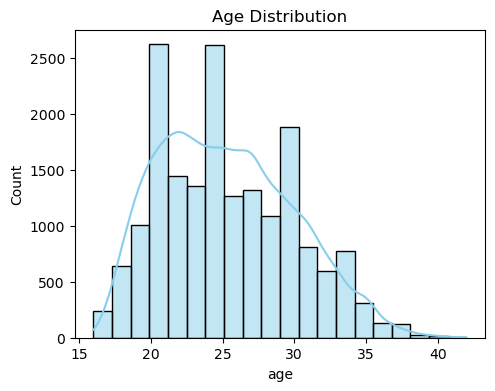

In [14]:
# Plot distributions of age, height, and weight
plt.figure(figsize=(18, 4))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Height Distribution')

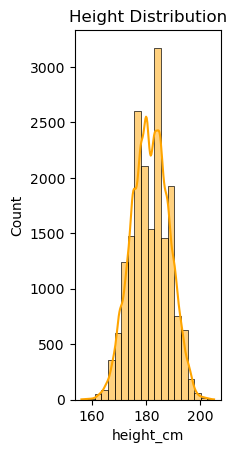

In [15]:
# Height distribution
plt.subplot(1, 3, 2)
sns.histplot(df['height_cm'].dropna(), bins=20, kde=True, color='orange')
plt.title('Height Distribution')

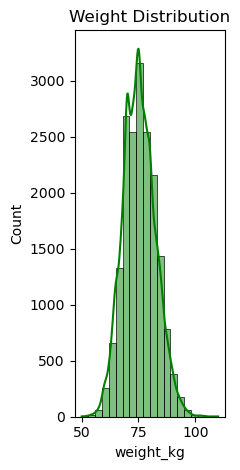

In [16]:
# Weight distribution
plt.subplot(1, 3, 3)
sns.histplot(df['weight_kg'].dropna(), bins=20, kde=True, color='green')
plt.title('Weight Distribution')

plt.tight_layout()
plt.show()

In [17]:
skill_features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = df[skill_features]

In [18]:
X = X.fillna(X.mean(numeric_only=True))


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

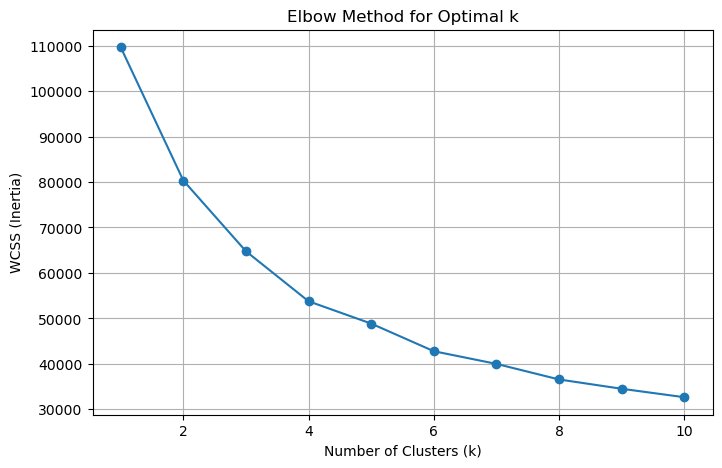

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

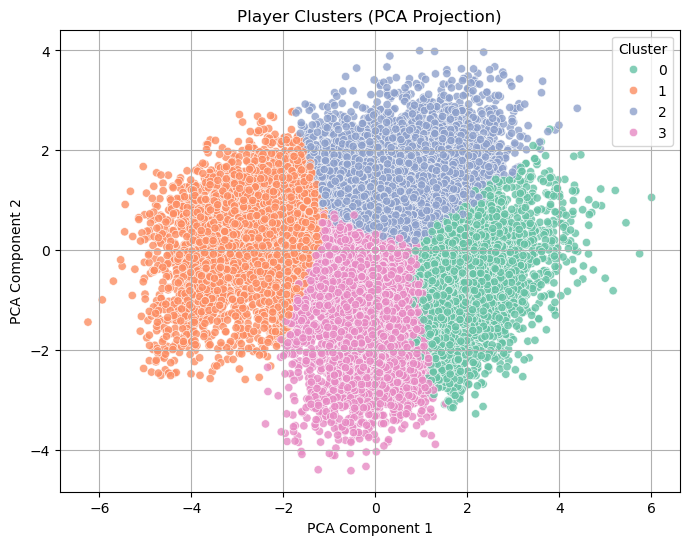

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set2', alpha=0.8)
plt.title('Player Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [25]:
cluster_profile = df.groupby('Cluster')[skill_features].mean()
print("Cluster Skill Averages:")
print(cluster_profile)

silhouette = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {silhouette:.2f}")

Cluster Skill Averages:
              pace   shooting    passing  dribbling  defending     physic
Cluster                                                                  
0        77.375140  66.248324  63.719832  72.167318  36.490782  61.791899
1        57.288922  33.296108  45.529940  48.160180  62.733234  68.701198
2        67.589932  55.642112  64.807858  67.151627  65.481686  71.537139
3        67.855242  51.663585  52.466291  60.485682  39.945209  57.147238

Silhouette Score: 0.23


In [26]:
#Top 10 countries

top_countries = df['nationality'].value_counts().head(10)
print("Top 10 Countries with Most Players:")
print(top_countries)

Top 10 Countries with Most Players:
nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: count, dtype: int64


C:\Users\Farhan\AppData\Local\Temp\ipykernel_10552\2186406300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


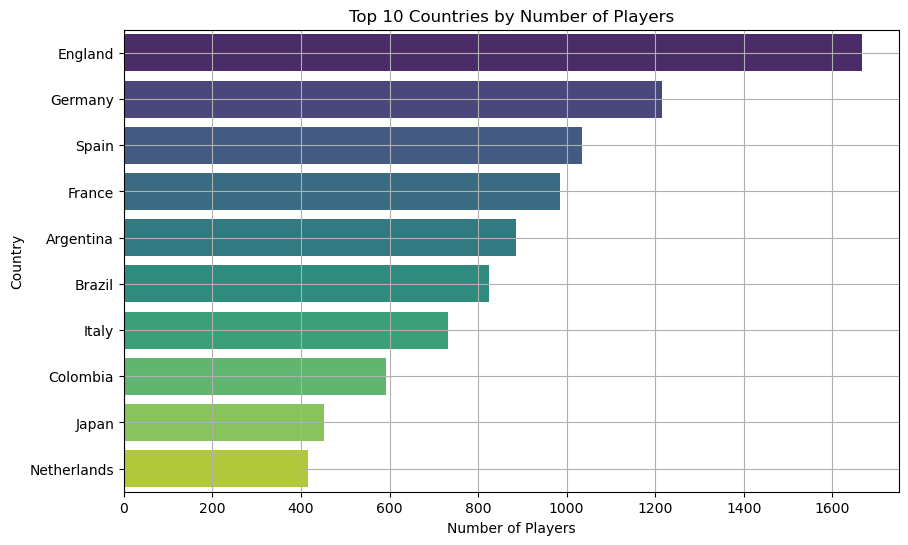

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Number of Players")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.grid(True)
plt.show()

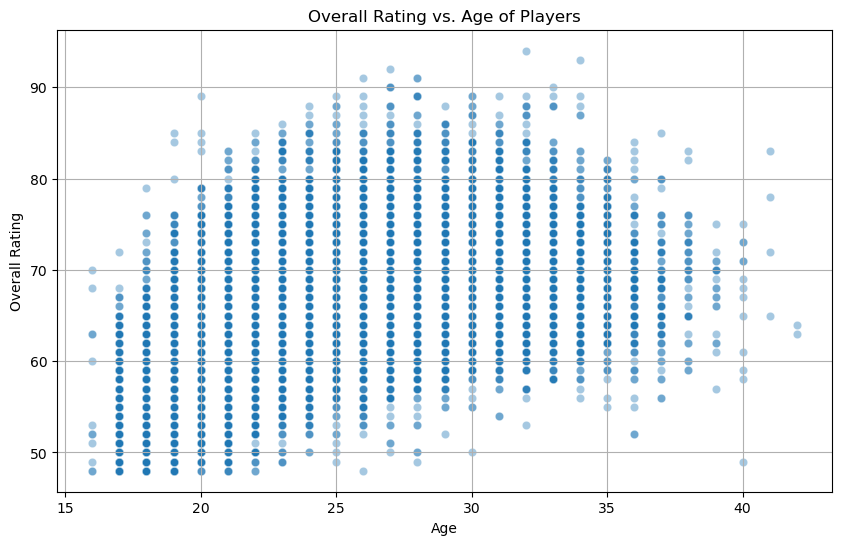

In [28]:
#Distribution of overall rating vs. age

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='overall', alpha=0.4)
plt.title("Overall Rating vs. Age of Players")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.grid(True)
plt.show()

In [29]:
# Filter players with valid positions and offensive roles
offensive = df[df['player_positions'].notna()]
offensive = offensive[offensive['player_positions'].str.contains('ST|RW|LW', na=False)]

In [30]:
# Extract the primary position
offensive['main_position'] = offensive['player_positions'].apply(lambda x: x.split(',')[0].strip())

In [31]:
# Calculate average wages
position_wages = offensive.groupby('main_position')['wage_eur'].mean()
print("\nAverage Wages for Offensive Positions (ST, RW, LW):")
print(position_wages.loc[['ST', 'RW', 'LW']].sort_values(ascending=False))


Average Wages for Offensive Positions (ST, RW, LW):
main_position
RW    15848.238482
LW    14037.037037
ST    10152.594888
Name: wage_eur, dtype: float64


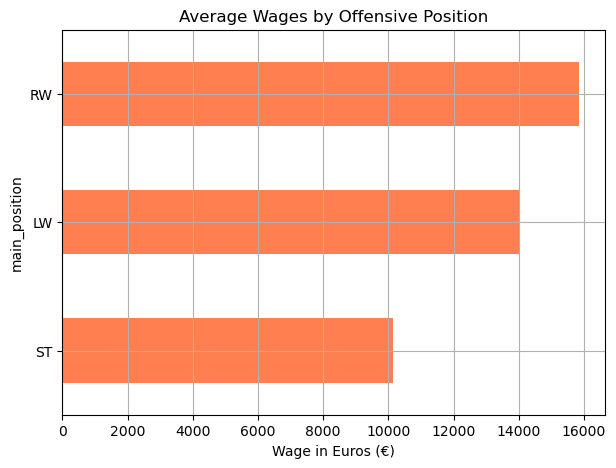

In [32]:
# Plot wage comparison
plt.figure(figsize=(7, 5))
position_wages.loc[['ST', 'RW', 'LW']].sort_values().plot(kind='barh', color='coral')
plt.title("Average Wages by Offensive Position")
plt.xlabel("Wage in Euros (€)")
plt.grid(True)
plt.show()